### 지도학습 절차

- 지도학습 : 목표변수(Y)와 설명변수(X)의 관계를 학습해서, 새로운 X가 들어올 때, Y를 예측 / 분류

- 지도학습의 절차 6단계:
  1. 데이터 핸들링 (데이터 불러오기 / 파생변수 생성 / 층별화) : 데이터 구조적인 관점에서 학습을 수행할 수 있는 데이터셋을 구성하는 과정

  2. 학습에 사용될 목표변수(Y)와 설명변수(X)를 설정
    - 유의사항 : 사용되는 X는 새로 들어올 데이터에 대한 값으로 지정 ex. 신규고객 이탈 예측을 할 때 구매횟수와 방문횟수를 넣으면 안 됨.

  3. 학습 데이터(Train Set)와 검증 데이터(Test Set)분할
    - 검증 데이터(Test Set)는 학습에 참여하지 않는다! (교차검증에서 Validation Set과는 다른 개념)

  4. 학습을 수행 (Modeling)
    - 특성공학 (결측값 처리 / Encoding / Scaling ...) -> Pipe Line을 이용해서
    - 학습 (알고리즘)

  5. 학습된 모델 평가
    - 학습 능력 평가
    - 일반화 능력 평가


In [139]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np

- 사용한 데이터 (https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

In [140]:
# 데이터 불러오기
df1 = pd.read_csv("C:/Users/jangs/Downloads/2주차/2주차/diabetes.csv")
print(df1.shape)
print(df1.info())
print(df1.head())
print(df1.tail())

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2         

In [141]:
# 환자의 건강 관련 정보를 입력했을 때, 당뇨병에 걸릴지 말지에 대한 판별 모델 생성
# 1) 데이터 핸들링
df1['Outcome'].unique()

array([1, 0])

## **결측치는 없지만 0이 나올 수 있는 변수와 아닌 변수를 구분해서 EDA 할 것**

In [142]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


데이터의 기술 통계량을 전치하여 전체적인 분포를 확인하였다.
glucose, bloodpressure, skinthickness, bmi 변수에서 최소값이 0으로 나타나 일부 값의 누락 가능성을 확인할 수 있었다. 또한 insulin은 평균에 비해 표준편차가 크게 나타나 변동성이 큰 변수임을 알 수 있다.

In [143]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [144]:
df1.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [145]:
df1.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## **Pregrance**
 - 임신횟수

In [146]:
df1['Pregnancies'].nunique()

17

In [147]:
df1['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

변수값이 최소 0회부터 최대 17회로 확인된다. 일반적으로 5~6회 이상은 평균을 상회하는 횟수로 보였지만, 특수한 경우가 존재할 수 있으니 이상치로 처리하지 않았다.

In [148]:
import seaborn as sns

<Axes: xlabel='Pregnancies', ylabel='count'>

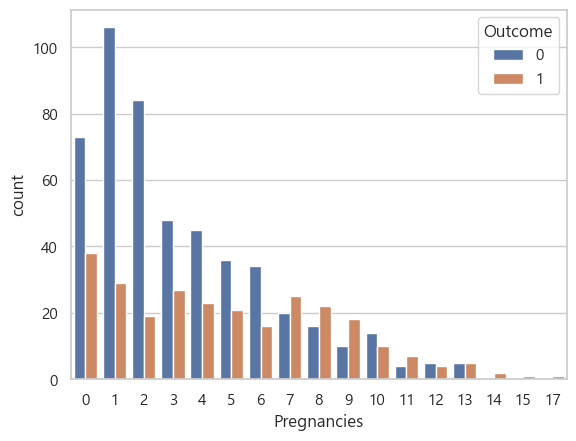

In [149]:
sns.countplot(data=df1, x='Pregnancies', hue='Outcome')

In [150]:
(pd.crosstab(df1['Pregnancies'], df1['Outcome'], normalize='index') * 100).round(2)

Outcome,0,1
Pregnancies,,
0,65.77,34.23
1,78.52,21.48
2,81.55,18.45
3,64.00,36.00
4,66.18,33.82
5,63.16,36.84
6,68.00,32.00
7,44.44,55.56
8,42.11,57.89


하위40프로 그룹에서는 당뇨 확률이 희박하지만 상위40퍼 그룹에 진입하는순간 발병률이 약 65프로로 폭증하는 것을 확인할 수 있다. 

### **변수 인사이트 정리**

1. 임신 횟수가 0~6회까지는 비환자의 비율이 더 높지만, 7회부터는 당뇨 환자의 비율이 50%를 넘어서며 역전되는 것을 수치로 확인할 수 있었다.
2. 임신 횟수 14회 이상의 발병률이 100%로 나오는 것은 표본의 개수가 너무 적기 때문일 수 있다는 점을 고려해야한다.

## **glucose**
- 혈장 포도당 농도
- 사람 혈당이 0일 수는 없다.
- 당뇨는 혈당이 지속적으로 높은 증상

<Axes: ylabel='Glucose'>

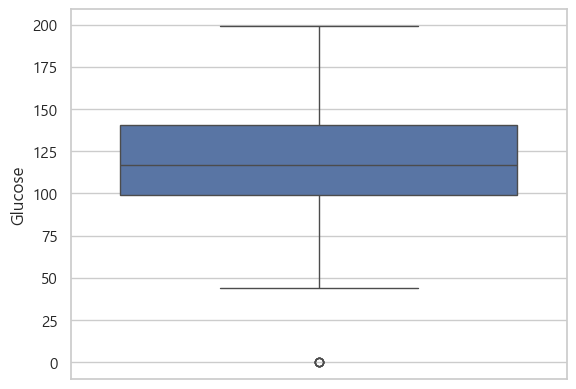

In [151]:
sns.boxplot(df1['Glucose'])

해당 데이터에 0이 존재할 수 없고, 저혈당 환자가 보이는 듯 하나, 역시 아주 불가능한 수치가 아니므로 0에 대한 결측치만 처리하는 것이 좋아보인다.

In [152]:
df1["Glucose"].describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

출처: https://diabetesjournals.org/care/article/47/Supplement_1/S111/153951/6-Glycemic-Goals-and-Hypoglycemia-Standards-of

Level 1 hypoglycemia: 혈당 < 70 mg/dL (3.9 mmol/L) 이상 54 mg/dL (3.0 mmol/L) 이하 -> 경고 수준 \
Level 2 hypoglycemia: 혈당 < 54 mg/dL (3.0 mmol/L) -> 임상적으로 의미 있는 저혈당 \
Level 3 hypoglycemia: 의식/인지 장애가 있어 타인 도움이 필요한 급성 저혈당(직접적인 기준 X)

In [153]:
df1.loc[df1["Glucose"] > 0, "Glucose"].min() # 0 다음으로 작은 수 확인

44

Level 2 hypoglycemi에 해당하는 값이긴 하지만, 역시 불가능한 값은 아니기에 가지고 가도록 하겠다.

In [154]:
print((df1["Glucose"] == 0).sum())

5


결측치가 5개 나왔으므로, 전체 변수에 비해 매우 낮은 수치이다. 따라서 해당 결측치를 채우기 위하여 중앙값을 활용했다.

In [155]:
glucose_median = df1.loc[df1["Glucose"] > 0, "Glucose"].median()
glucose_median

117.0

In [157]:
df1["Glucose_imputed"] = df1["Glucose"]   # 원래 컬럼 보존용
df1.loc[df1["Glucose_imputed"] == 0, "Glucose_imputed"] = glucose_median

In [158]:
df1["Glucose_was_imputed"] = (df1["Glucose"] == 0).astype(int)
df1["Glucose_was_imputed"].value_counts()

Glucose_was_imputed
0    763
1      5
Name: count, dtype: int64

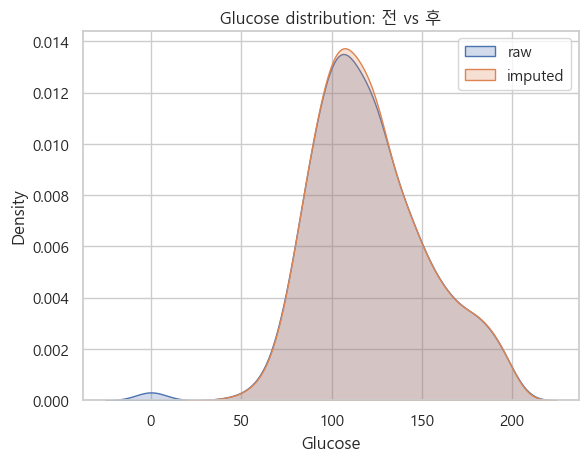

In [160]:
sns.kdeplot(df1["Glucose"], label="raw", fill=True)
sns.kdeplot(df1["Glucose_imputed"], label="imputed", fill=True)
plt.legend()
plt.title("Glucose distribution: 전 vs 후")
plt.show()

In [162]:
df1.groupby("Outcome")["Glucose"].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,500.0,109.980000,26.141200,0.0,93.0,107.0,125.0,197.0
1,268.0,141.257463,31.939622,0.0,119.0,140.0,167.0,199.0


In [161]:
df1.groupby("Outcome")["Glucose_imputed"].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,500.0,110.682000,24.707201,44.0,93.0,107.5,125.0,197.0
1,268.0,142.130597,29.568839,78.0,119.0,140.0,167.0,199.0


Glucose 변수에서 0값으로 나타난 관측치는 분포상 극단적인 값으로 판단되어 중앙값으로 대체하였다. 대체 전후를 비교한 결과, 전체 분포는 유지된 것으로 보이며 outcome에 따른 glucose 분포 차이 또한 거의 동일한 것으로 보여진다.

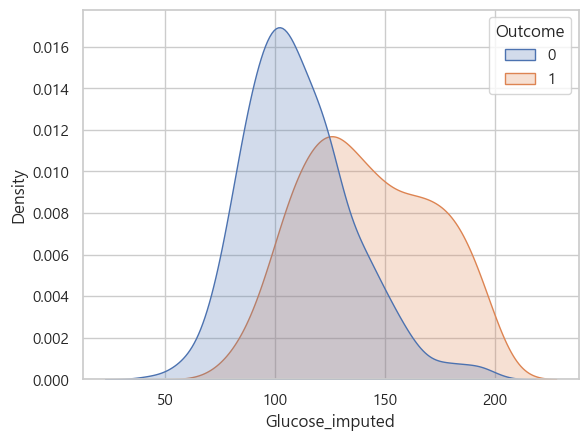

In [163]:
sns.kdeplot(data=df1,
            x='Glucose_imputed',
            hue='Outcome',
            fill=True,
            common_norm=False
)
plt.show()

outcome=1 집단의 glucose 분포가 outcome=0 집단보다 전반적으로 높은 영역에 위치한다.

In [166]:
df1[['Glucose_imputed', 'Outcome']].corr()

,Glucose_imputed,Outcome
Glucose_imputed,1.000000,0.492782
Outcome,0.492782,1.000000


glucose와 outcome 간에는 중간 수준의 양의 상관관계가 관찰된다.

### **변수 인사이트 정리**

1. 0을 극단적인 값으로 판단하여 중앙값으로 대체하였고, 대체 전후를 파악한 결과 전체 분포는 유지되었다.
2. Glucose 값이 증가할수록 Outcome=1의 비율이 높아지는 경향이 보인다.

## **bloodpressure**
- 혈압
- 혈압도 0일 수는 없다


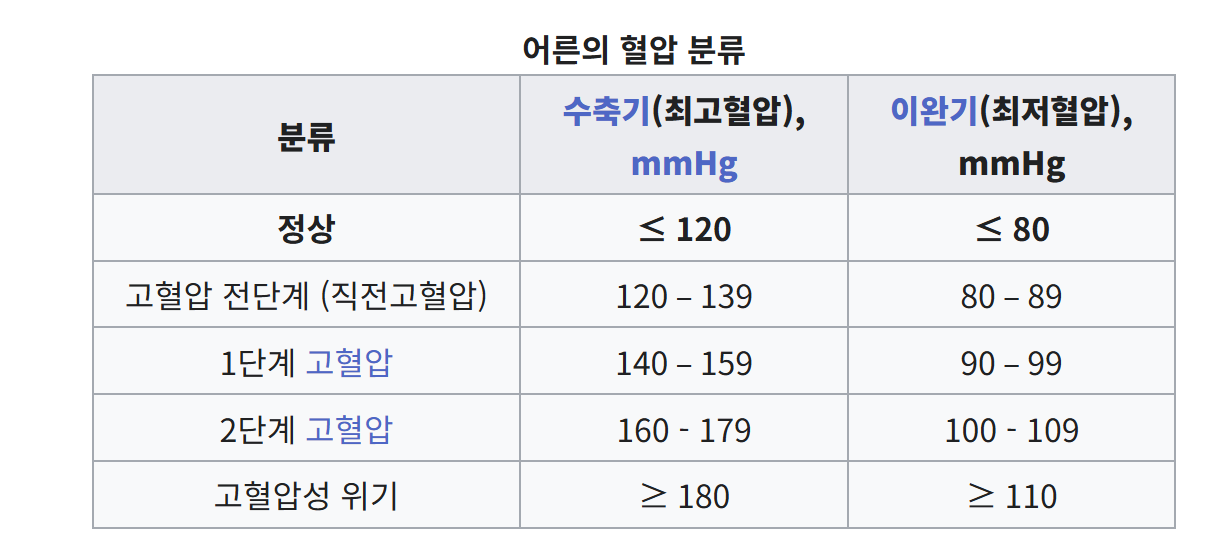
저혈압 | <90 | <60

<Axes: ylabel='BloodPressure'>

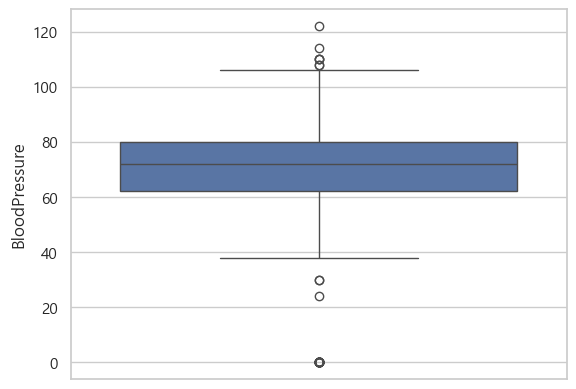

In [196]:
sns.boxplot(df1['BloodPressure'])

In [197]:
df1['BloodPressure'].describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [198]:
df1['BloodPressure'].unique()

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114])

In [199]:
df1.loc[df1['BloodPressure'] > 0, 'BloodPressure'].min() 

24

0을 제외한 혈압 중 가장 낮은 수치를 파악하였다. 이 역시 매우 낮은 수치임에 분명하나, 극히 드문 사례일 것이라 생각하여 따로 결측치 처리하지 않았다.

In [200]:
print((df1['BloodPressure'] == 0).sum())

35


In [201]:
BloodPressure_median = df1.loc[df1['BloodPressure'] > 0, 'BloodPressure'].median()
BloodPressure_median

72.0

In [202]:
df1["BloodPressure_imputed"] = df1["BloodPressure"]   # 원래 컬럼 보존용
df1.loc[df1["BloodPressure_imputed"] == 0, "BloodPressure_imputed"] = BloodPressure_median

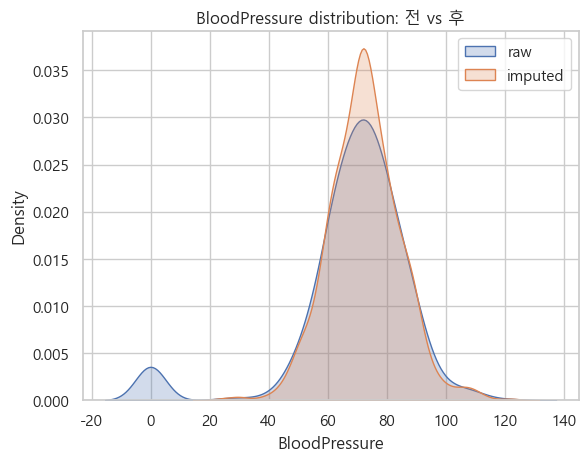

In [203]:
sns.kdeplot(df1["BloodPressure"], label="raw", fill=True)
sns.kdeplot(df1["BloodPressure_imputed"], label="imputed", fill=True)
plt.legend()
plt.title("BloodPressure distribution: 전 vs 후")
plt.show()

In [204]:
df1.groupby("Outcome")["BloodPressure"].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,500.0,68.184000,18.063075,0.0,62.0,70.0,78.0,122.0
1,268.0,70.824627,21.491812,0.0,66.0,74.0,82.0,114.0


In [205]:
df1.groupby("Outcome")["BloodPressure_imputed"].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,500.0,70.920000,11.929385,24.0,63.5,72.0,78.0,122.0
1,268.0,75.123134,11.951672,30.0,68.0,74.0,82.0,114.0


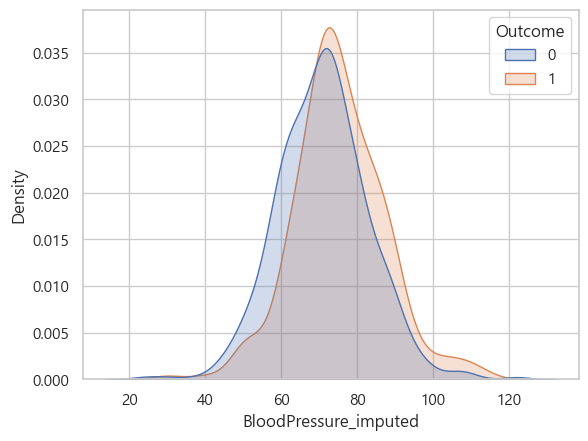

In [206]:
sns.kdeplot(data=df1,
            x='BloodPressure_imputed',
            hue='Outcome',
            fill=True,
            common_norm=False
)
plt.show()

In [207]:
df1[['BloodPressure_imputed', 'Outcome']].corr()

,BloodPressure_imputed,Outcome
BloodPressure_imputed,1.000000,0.165723
Outcome,0.165723,1.000000


### **변수 인사이트 정리**

1. 요약통계량의 max가 122, median이 72인 것으로 보아 해당 혈압이 수축기 혈압임을 짐작할 수 있었다.
2. 혈압이 0으로 나온 값들을 모두 결측치라고 가정하여 중앙값으로 대체하였다.
3. 당뇨여부와의 관계는 크지 약한 상관관계를 보인다는 것을 파악할 수 있었다.

## **SkinThickness**
- 삼두근 피부 두께
- 체지방이란 관련이 있다.
- 0일 수 없다

<Axes: ylabel='SkinThickness'>

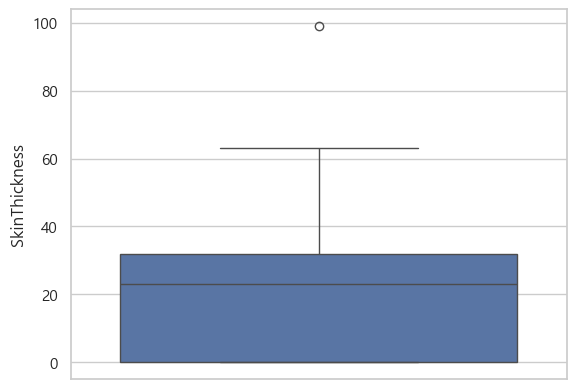

In [190]:
sns.boxplot(df1['SkinThickness'])

In [191]:
df1['SkinThickness'].describe()

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [ ]:
0과 99를 이상치로 판단하였다.

In [236]:
np.sort(df1["SkinThickness"].unique()) # 순서대로 보고 싶으면 np.sort 쓰면 될 듯!!

array([ 0,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 56, 60, 63, 99])

In [240]:
abnormal = (df1["SkinThickness"] == 0) | (df1["SkinThickness"] == 99)
abnormal.sum()

np.int64(228)

In [241]:
df1.loc[~abnormal, "SkinThickness"].describe() # 이상값을 빼고 본 요약통계량

count    540.000000
mean      29.024074
std       10.045046
min        7.000000
25%       22.000000
50%       29.000000
75%       36.000000
max       63.000000
Name: SkinThickness, dtype: float64

In [244]:
skin_median = df1.loc[~abnormal, "SkinThickness"].median()
skin_median

29.0

In [245]:
df1["SkinThickness_imputed"] = df1["SkinThickness"]  # 원본 보존

df1.loc[abnormal, "SkinThickness_imputed"] = skin_median

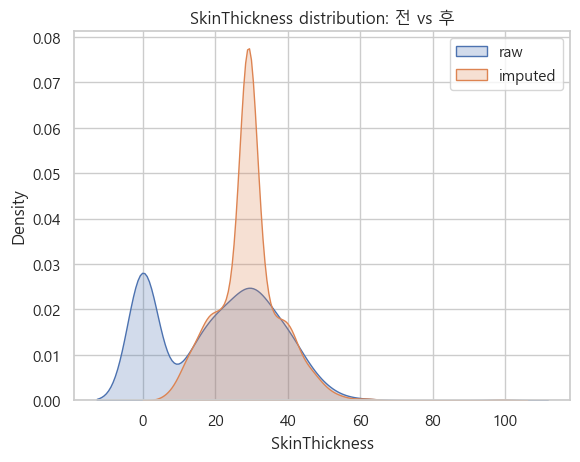

In [248]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(df1["SkinThickness"], label="raw", fill=True)
sns.kdeplot(df1["SkinThickness_imputed"], label='imputed', fill=True)

plt.legend()
plt.title("SkinThickness distribution: 전 vs 후")
plt.show()

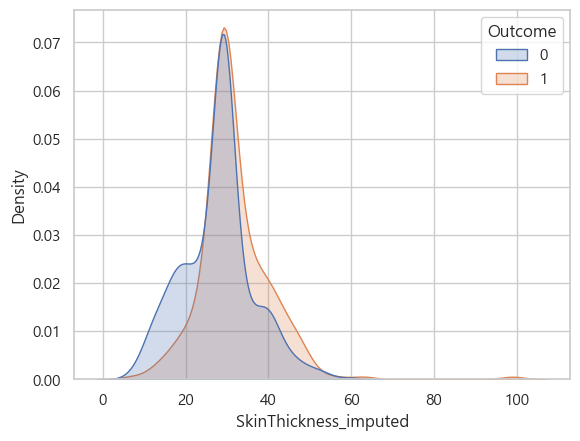

In [249]:
sns.kdeplot(data=df1,
            x="SkinThickness_imputed",
            hue="Outcome",
            fill=True,
            common_norm=False
)
plt.show()

In [250]:
df1[['SkinThickness_imputed', 'Outcome']].corr()

,SkinThickness_imputed,Outcome
SkinThickness_imputed,1.000000,0.214873
Outcome,0.214873,1.000000


### **변수 인사이트 정리**

1. 당뇨 발병과의 관계는 역시 약한 상관관계를 가지는 것으로 판단된다.
2. 0과 99를 이상치로 판단하여, 해당 데이터를 중앙값으로 대체하였다.

## **Insulin**
- 인슐린 분비량
- 당뇨병 유형은 인슐린이 선천적으로 나오지 않는 사람(1형)과 인슐린이 나오지만 인식을 못하는 사람(2형) 당뇨병 두가지가 있다.
- 0이 나올 수 있다.

<Axes: ylabel='Insulin'>

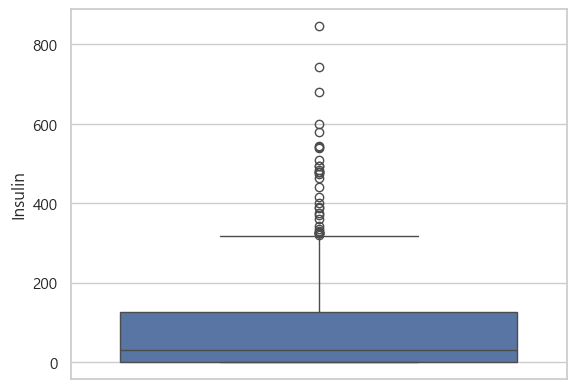

In [218]:
sns.boxplot(df1['Insulin'])

In [215]:
df1['Insulin'].describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

In [251]:
np.sort(df1["Insulin"].unique())

array([  0,  14,  15,  16,  18,  22,  23,  25,  29,  32,  36,  37,  38,
        40,  41,  42,  43,  44,  45,  46,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  63,  64,  65,  66,  67,
        68,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  94,  95,  96,
        99, 100, 105, 106, 108, 110, 112, 114, 115, 116, 119, 120, 122,
       125, 126, 127, 128, 129, 130, 132, 135, 140, 142, 144, 145, 146,
       148, 150, 152, 155, 156, 158, 159, 160, 165, 166, 167, 168, 170,
       171, 175, 176, 178, 180, 182, 183, 184, 185, 188, 190, 191, 192,
       193, 194, 196, 200, 204, 205, 207, 210, 215, 220, 225, 228, 230,
       231, 235, 237, 240, 245, 249, 250, 255, 258, 265, 270, 271, 272,
       274, 275, 277, 278, 280, 284, 285, 291, 293, 300, 304, 310, 318,
       321, 325, 326, 328, 330, 335, 342, 360, 370, 375, 387, 392, 402,
       415, 440, 465, 474, 478, 480, 485, 495, 510, 540, 543, 54

In [252]:
print((df1['Insulin'] == 0).sum())

374


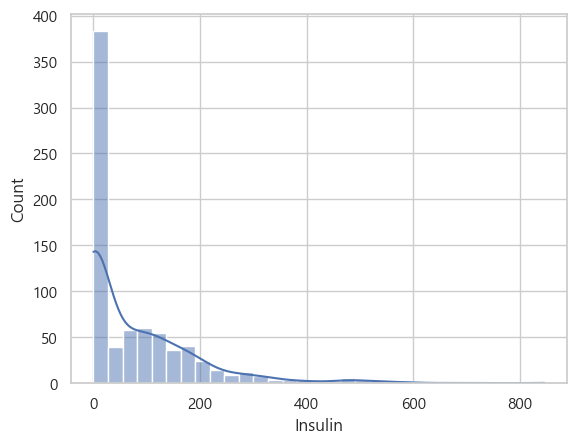

In [253]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df1["Insulin"], kde=True)
plt.show()

right-skewed 되어있는 모습을 보이며, 상당한 분포가 0에 집중되어있음을 확인할 수 있다. 0을 결측치 처리하고 싶지만 특이 케이스가 있으므로, 결측값 처리에 주의해야 한다.

In [255]:
df1["Insulin_zero"] = (df1["Insulin"] == 0).astype(int)
pd.crosstab(df1["Insulin_zero"], df1["Outcome"], normalize="index")

Outcome,0,1
Insulin_zero,,
0,0.670051,0.329949
1,0.631016,0.368984


따라서 0이 포함되냐 안되냐를 기준으로 결과를 비교해보았다. 인슐링이 0이 아닌 사람(Insulin_zero=0) 중 33%가 당뇨이고, 인슐린이 0인 사람 중 약 37%가 당뇨라는 것을 확인할 수 있다.

### **변수 인사이트 정리**


1. 인슐린이 0인 경우 당뇨여부의 비율이 약 4% 높게 나타났지만, 해당 차이의 경우 유의미가 결과가 있다고 보기에 는 어려움이 있어 보였다. 따라서 단독 변수로 분리해 보기에는 제한적이라 생각했다.
2. 실제 생리적 의미를 가질 수 있을 것으로 보아 결측으로 처리하지 않았다.

## **BMI**
- 0일 수 없다
- 체질량지수가 증가할수록 인슐린 저항성이 올라가기 때문에 2형 당뇨 위험도가 상승할 수 있다.

체질량지수 범위
- 저체중 : < 18.5
- 정상 : 18.5 ~ 24.9
- 과체중 : 25 ~ 29.9
- 비만 : >= 30

In [258]:
df1['BMI'].describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

In [264]:
np.sort(df1['BMI'].unique())

array([ 0. , 18.2, 18.4, 19.1, 19.3, 19.4, 19.5, 19.6, 19.9, 20. , 20.1,
       20.4, 20.8, 21. , 21.1, 21.2, 21.7, 21.8, 21.9, 22.1, 22.2, 22.3,
       22.4, 22.5, 22.6, 22.7, 22.9, 23. , 23.1, 23.2, 23.3, 23.4, 23.5,
       23.6, 23.7, 23.8, 23.9, 24. , 24.1, 24.2, 24.3, 24.4, 24.5, 24.6,
       24.7, 24.8, 24.9, 25. , 25.1, 25.2, 25.3, 25.4, 25.5, 25.6, 25.8,
       25.9, 26. , 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.7, 26.8, 26.9,
       27. , 27.1, 27.2, 27.3, 27.4, 27.5, 27.6, 27.7, 27.8, 27.9, 28. ,
       28.1, 28.2, 28.3, 28.4, 28.5, 28.6, 28.7, 28.8, 28.9, 29. , 29.2,
       29.3, 29.5, 29.6, 29.7, 29.8, 29.9, 30. , 30.1, 30.2, 30.3, 30.4,
       30.5, 30.7, 30.8, 30.9, 31. , 31.1, 31.2, 31.3, 31.6, 31.9, 32. ,
       32.1, 32.2, 32.3, 32.4, 32.5, 32.6, 32.7, 32.8, 32.9, 33.1, 33.2,
       33.3, 33.5, 33.6, 33.7, 33.8, 33.9, 34. , 34.1, 34.2, 34.3, 34.4,
       34.5, 34.6, 34.7, 34.8, 34.9, 35. , 35.1, 35.2, 35.3, 35.4, 35.5,
       35.6, 35.7, 35.8, 35.9, 36. , 36.1, 36.2, 36

In [259]:
(df1['BMI'] == 0).sum()

np.int64(11)

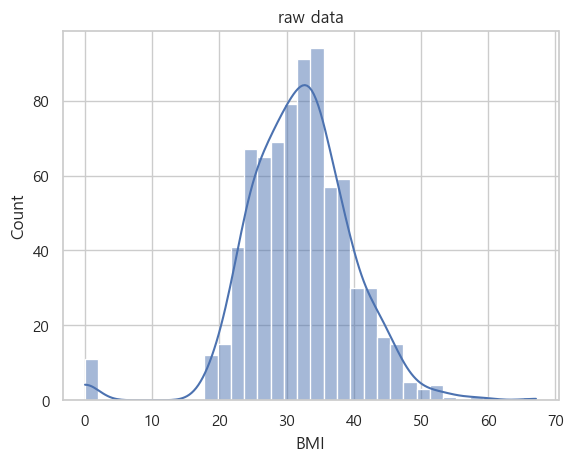

In [262]:
sns.histplot(df1['BMI'], kde=True)
plt.title('raw data')
plt.show()

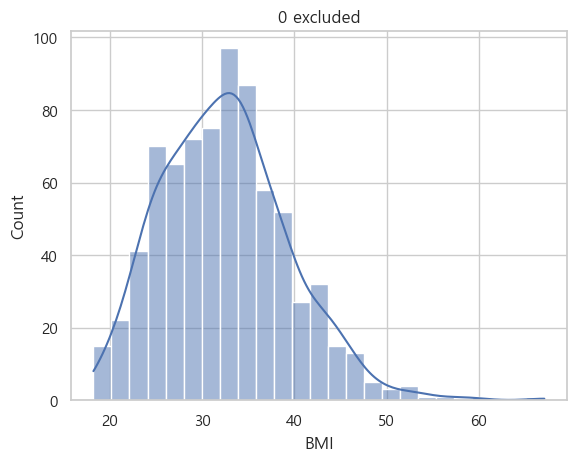

In [263]:
sns.histplot(df1.loc[df1['BMI'] > 0, 'BMI'], kde=True)
plt.title('0 excluded')
plt.show()

다소 비대칭적이라 할 수 있으므로 이상치 0 역시 중앙값으로 대체하겠다.

In [266]:
bmi_median = df1.loc[df1['BMI'] > 0, 'BMI'].median()

df1['BMI_imputed'] = df1['BMI']
df1.loc[df1['BMI_imputed'] == 0, 'BMI_imputed'] = bmi_median

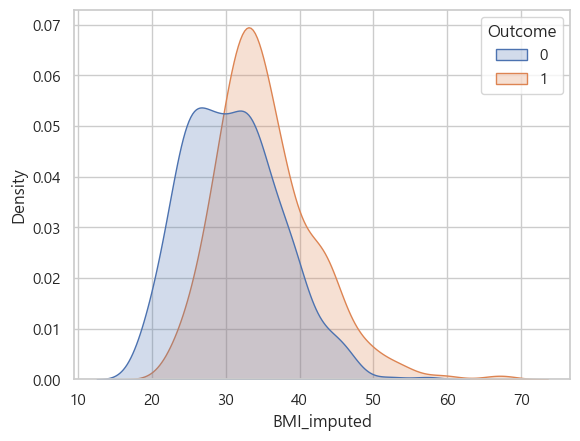

In [267]:
sns.kdeplot(data=df1,
            x='BMI_imputed',
            hue='Outcome',
            fill=True,
            common_norm=False
)
plt.show()

당뇨가 있는 집단은 평균적으로 체절량지수가 더 높은 쪽에 몰려 있다는 것을 관찰할 수 있다.

### **변수 인사이트 정리**

1. 고도비만의 수치를 훌쩍 넘어가는 데이터가 보임에도 실제 존재여부를 무시할 수 없으므로 결측치 처리하지 않았다.
2. 당뇨가 있는 집단이 BMI가 더 높게 나옴은 확인할 수 있었지만, 두 분포가 상당 부분 겹치는 것으로 보아 BMI만으로 당뇨 여부를 완전히 구분하기는 어려울 것으로 보였다.

## **파생변수 생성 및 추가 전처리**

### 전체 데이터 파악하기

In [54]:
df1.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

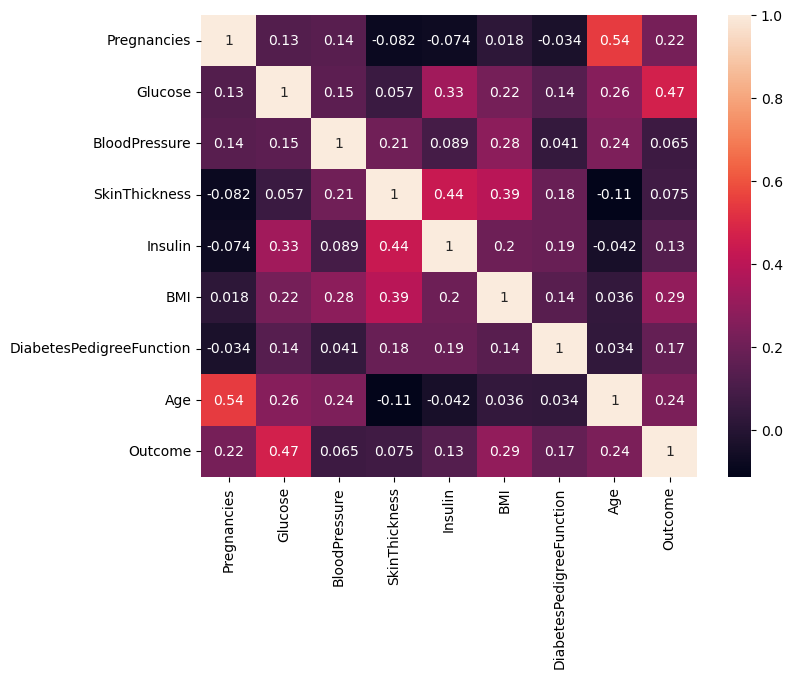

In [52]:
plt.figure(figsize = (8,6))

sns.heatmap(df1.corr(), annot =True)

상관분석 결과, outcome과 가장 높은 선형 상관을 보인 변수는 glucose였으며, bmi, age, pregnancies가 그 뒤를 이었다. 반면 bloodpressure와 skinthickness는 단독으로는 outcome과의 상관이 낮았다. 변수 간 관계를 살펴보면 age와 pregnancies는 높은 상관을 보여 중복 정보 가능성이 있으며, skinthickness, insulin, bmi는 서로 중간 이상의 상관을 가지는 하나의 변수군으로 관찰되었다. 이는 일부 변수들이 단독보다는 조합을 통해 예측력을 가질 것으로 보인다.

## 데이터 정리

In [270]:
df1.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Glucose_imputed',
       'Glucose_was_imputed', 'BloodPressure_imputed', 'SkinThickness_imputed',
       'Insulin_zero', 'BMI_imputed'],
      dtype='object')

# **모델링하기**

In [386]:
# 2) 목표변수 / 설명변수 설정
# 파생 변수는 추가하고, 필요 없는 변수는 빼기

X = df1[['Pregnancies', 'Insulin', 'Age', 'Glucose_imputed', 'BMI_imputed','DiabetesPedigreeFunction']]
Y = df1['Outcome'] # Y값에는 결측치가 존재해서는 안됨

In [387]:
# 3) 학습데이터와 검증데이터를 분할
# pip install scikit-learn
from sklearn.model_selection import train_test_split

In [388]:
train_test_split(X,Y) # X 데이터의 학습, 검증 데이터 & Y 데이터의 학습, 검증데이터 4개로 분리됨

[     Pregnancies  Insulin  Age  Glucose_imputed  BMI_imputed  \
 740           11      150   48              120         42.3   
 516            9      165   53              145         30.3   
 171            6      130   29              134         35.4   
 14             5      175   51              166         25.8   
 623            0      115   21               94         43.5   
 ..           ...      ...  ...              ...          ...   
 39             4      207   56              111         37.1   
 190            3        0   21              111         22.6   
 392            1      415   21              131         23.7   
 660           10        0   54              162         27.7   
 104            2        0   27               85         39.6   
 
      DiabetesPedigreeFunction  
 740                     0.785  
 516                     0.771  
 171                     0.542  
 14                      0.587  
 623                     0.347  
 ..                 

In [389]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1234)
# train_test_split()에 별도의 옵션을 지정하지 않으면 75:25로 학습:검증 분할됨
# random_state을 지정해야 같은 결과가 나옴

In [390]:
X.isnull().sum()

Pregnancies                 0
Insulin                     0
Age                         0
Glucose_imputed             0
BMI_imputed                 0
DiabetesPedigreeFunction    0
dtype: int64

=> X에도 결측치가 없는 데이터이지만, 추후 새로 들어올 데이터에 결측치가 존재할 수 있음

# **각자 공부한 모델 쓰기**

Logistic Regression?
- 종속 변수가 범주형(특히, 이진)일떄, 설명변수로부터 어떤 사건이 발생할 확률을 예측하는 모델이다. 선형회귀처럼 직접적으로 값을 예측하는 것이 아니라, 확률을 예측하여 그 확률을 기준으로 클래스를 결정한다. 데이터의 결과가 특정 분류로 나뉘기 떄문에 일종의 분류 기법으로도 볼 수 있다.
- 로지스틱 모형 식은 독립 변수가 어느 숫자이든 관계 없이 결과 값이 항상 0 이상 1 이하에 있게 한다(시그모이드 함수). 이는 오즈를 로짓 변환을 함으로써 얻어진다.
- 로지스틱 회귀의 계수인 β0 및 β1는 최대 우도 추정(MLE)을 사용하여 추정된디. 

- 오즈 (odds) & 로짓 변환 : 성공 확률이 실패 확률에 비해 몇 배 더 높은가를 나타내며 그 식은 아래와 같다.
  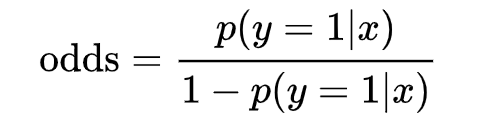

- 로짓 변환 : 오즈에 로그를 취한 함수로서 입력 값의 범위가 [0,1] 일 때 출력 값의 범위를 (−∞,+∞)로 조정한다.
  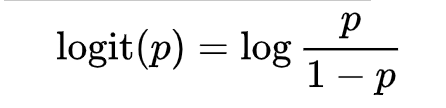

- 로지스틱 함수 : 로지스틱 함수의 그래프는 Figure 1과 같고 이는 독립 변수 x가 주어졌을 때 종속 변수가 1의 범주에 속할 확률을 의미한다. 즉, p(y=1|x)를 의미한다. 로지스틱 함수는 로짓 변환을 통해 만들어지고, 그 형태는 다음과 같다.
  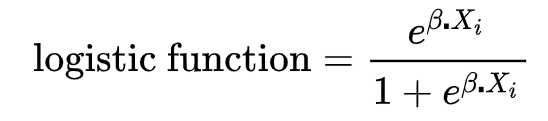

종류?
1. 이진 로지스틱 회귀: 종속 변수가 이분형인 경우에 사용하며, 결과값이 두 가지로만 나타난다. \
특징: 로지스틱 회귀 모델 중 가장 보편적인 형태이며, 이진 분류 문제에서 표준적인 알고리즘으로 활용된다. \
예시: 수신된 메일의 스팸 여부 예측

3. 다항 로지스틱 회귀: 종속 변수의 범주가 세 가지 이상이며, 각 범주 간에 서열이나 순위가 없는 경우에 적용한다. \
특징: 개별 독립 변수들이 여러 선택지 중 하나를 선택할 확률에 미치는 영향력을 결정한다. 마케팅이나 사회과학 분야에서 선호도 분석에 자주 쓰인다. \
예시: 사용자의 거주 지역이나 소득에 따른 정당 지지율 분석

4. 순서형 로지스틱 회귀: 종속 변수의 범주가 세 가지 이상이면서, 각 값 사이에 명확한 순서나 계층이 존재하는 경우에 사용한다. \
특징: 범주 간의 간격이 일정하지 않더라도 순위 자체가 중요한 정보를 담고 있을 때 적합하다. \
"예시: 학점 등급(A, B, C, D, F) 예측


출처: https://ko.wikipedia.org/wiki/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80
https://www.ibm.com/kr-ko/think/topics/logistic-regression#684929715

In [437]:
# 4) 학습 수행
from sklearn.linear_model import LogisticRegression

In [438]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train, Y_train) # 학습 수행

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


In [439]:
# 5) 성능 확인
from sklearn.metrics import accuracy_score
# 정확도 : 전체 데이터 중 얼만큼 정확히 분류했는지 비율

In [440]:
Y_train_pred = model.predict(X_train)

In [441]:
Y_test_pred = model.predict(X_test)

In [442]:
print('학습 정확도 : ', accuracy_score(Y_train, Y_train_pred)) # 여러 알고리즘에 대한 모델을 비교할 때 확인해야 함
print('검증 정확도 : ', accuracy_score(Y_test, Y_test_pred))

학습 정확도 :  0.7795138888888888
검증 정확도 :  0.7552083333333334


이 모델은 학습 데이터에서는 약 78%, 새 데이터에서는 약 76% 정확도로 당뇨 여부를 예측한다. 두 값의 차이가 크지 않아 과적합이라고 보지 않아도 될 것이다.

### 과적합(Overfitting)

- 과적합 : 학습 데이터에 대해서는 Model이 높은 성능을 나타내지만, 검증데이터에서는 성능이 낮게 나오는 현상
- 해결 : 특성공학을 통해 데이터를 더 깔끔하게 생성

### 특성공학(Feature Engineering)
- **특성공학** : 학습의 목적에 맞게(학습이 잘 수행될 수 있도록) 데이터를 깔끔하게 다듬는 작업
- 대표적 기법 : 
  1. Scaling & Encoding : 숫자 데이터의 스케일을 맞추거나, 문자 데이터를 숫자로 변환하여 학습에 사용
  2. Imputation : 데이터 상에 존재하는 결측값에 대해 다른 값으로 대치 (새로 들어오는 데이터가 결측일 수도 있기 때문에)
  3. Cross Validation (교차검증): 학습데이터를 여러 단계로 나누어 분할하여 학습
  4. Hyper Parameter Tuning : 학습 알고리즘 내 존재하는 수학적 구조나 학습에 발생하는 구조, 함수들을 사용자가 통제
  5. Imbalanced Data Sampling : 목표변수의 비율이 깨져있는 데이터를 맞추어 학습
  6. Feature Selection : 목표변수에 가장 영향이 있는 인자를 사용자가 지정한 만큼 선택해서 학습
  7. PCA : 데이터의 차원을 줄이거나 특성을 재구성하여 학습

- Scikit Learn에서 특성공학 기법과 학습을 동시에 수행할 수 있게 Pipe Line 구성하여 학습을 수행

In [443]:
# 4) 학습 수행
from sklearn.pipeline import make_pipeline # 특성공학 + 학습
from sklearn.impute import SimpleImputer # 결측값 단순 대치 기법
from sklearn.tree import DecisionTreeClassifier # 학습 알고리즘(의사결정나무)
from sklearn.preprocessing import StandardScaler #Standard Scaling

In [444]:
# 파이프라인 구조 설계
#스케일링 하고 싶으면 StandardScaler() 사용

model_pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=900, class_weight='balanced'))
model_pipe

,steps,"[('standardscaler', ...), ('logisticregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


1. StandardScaler:
- 로지스틱 회귀는 변수 스케일에 민감함
- Glucose, BMI, Age 등 변수들의 단위가 서로 달라 계수 추정이 왜곡될 수 있으므로 표준화가 필요함
2. LogisticRegression:
- Outcome이 0/1인 이진 분류 문제이므로 확률 기반 분류 모델인 로지스틱 회귀를 사용함

In [445]:
from sklearn.model_selection import GridSearchCV

#### **공부한 모델의 하이퍼파라미터**

로지스틱 회귀분석의 하이퍼파라미터는 모델 학습 과정에서 직접 추정되는 값이 아니라, 데이터 분석자가 사전에 설정해야 하는 값이다. 이는 모델의 복잡도와 학습 특성에 영향을 준다.

1. 규제 강도
   - 로지스틱 회귀에서 과적합을 방지하기 위해 규제를 활용하며, 이의 강도를 조절하는 하이퍼파라미터가 존재한다.
   - 강도가 작을 경우, 모델이 데이터에 더 유연하게 맞춰지지만 이 경우 학습 데이터에 지나치게 적합될 우려가 있기 때문에 과적합이 발생할 가능성이 커진다.
   - 강도가 클 경우, 회귀계수의 크기가 제한되기 때문에 모델이 단순+과소적합이 발생할 가능성이 있다.
-> 적절한 규제 강도를 선택하는 것이 중요하다.
(규제 강도의 역수 C는 값이 작을 수록 규제가 강해지고, 값이 클수록 규제가 약해진다)

2. 규제 방식
   - L2 규제: 모든 변수의 계수를 고르게 줄이는 방식으로, 다중공선성 문제를 완화하는데 도움이 된다.
   - L1 규제: 일부 변수의 계수를 0으로 만들어 중요하지 않은 변수를 자동으로 제거해 모델의 성능에 도움이 된다. 다만, 규제가 지나치게 강해진다면 중요한 변수까지 제거될 가능성이 있다.
   - Elastic Net : L2와 L1의 혼합 형태로 고차원 데이터에서 자주 사용된다.

3. 최적화 알고리즘
   - lbfgs: 뉴턴 방법의 근사치로 속도가 빠르다.
   - liblinear: 데이터셋이 작고 L1 규제를 쓸 때 적합하다.
   - saga: 대용량 데이터와 Elastic Net 규제를 지원한다.

4. 반복 횟수
   - 모델이 수렴할 때까지의 학습 횟수로, 데이터가 복잡하면 이 값을 높여야 한다. 다만, 계산 시간이 증가할 수 있다는 점을 고려해야한다.

In [459]:
# 하이퍼파라미터 튜닝 및 교차검증
hyperparam = {"logisticregression__C": [0.01, 0.1, 1, 10, 100],     # 규제 강도(작을수록 규제 강함)
              "logisticregression__penalty": ["l2"],
              "logisticregression__solver": ["liblinear", "saga"]}


# GridSearchCV로 "교차검증 평균 점수가 가장 높은" 조합 찾기
# - cv=3: 3-fold 교차검증(우연한 분할에 덜 흔들리게)
# - scoring='f1': 클래스 불균형에서 accuracy보다 균형 있게 보려고 F1을 기준으로 최적화
grid_model1 = GridSearchCV(model_pipe, param_grid = hyperparam, cv=3,
                          scoring='f1', n_jobs=-1)

# 학습 데이터로 그리드서치 수행(여기서 "최적"이 자동으로 결정됨)
grid_model1.fit(X_train, Y_train)

best_model1 = grid_model1.best_estimator_

In [460]:
best_model1

,steps,"[('standardscaler', ...), ('logisticregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1


In [461]:
# 5) 평가
Y_train_pred = best_model1.predict(X_train) # 학습 데이터의 예측값 계산
Y_test_pred = best_model1.predict(X_test) # 검증데이터의 예측값 계산

In [462]:
from sklearn.metrics import classification_report

In [463]:
# 학습 성능 평가
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       379
           1       0.64      0.74      0.69       197

    accuracy                           0.77       576
   macro avg       0.75      0.76      0.75       576
weighted avg       0.78      0.77      0.77       576



In [464]:
# 일반화 성능 평가
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.79       121
           1       0.65      0.68      0.66        71

    accuracy                           0.74       192
   macro avg       0.73      0.73      0.73       192
weighted avg       0.75      0.74      0.75       192



학습 데이터와 테스트 데이터의 성능 차이가 크지 않아 모델이 과적합되지 않았다고 판단할 수 있다.
테스트 데이터 기준으로 당뇨 여부(Outcome=1)의 재현율이 0.68로 나타나, 전체 당뇨 환자의 약 68%를 올바르게 예측하였다고 할 수 있다.
비록 정확도는 전 모델과 비교해 소폭 하락해 0.74 수준이지만, recall의 수치가 올라가 당뇨인데 당노가 아닌 

# **성능을 높이기 위한 방안**

1. test 데이터의 정확도가 test 데이터의 정확도보다 많이 낮으면 과적합
2. 하이퍼파라미터 튜닝, 추가적인 전처리(변수 제거) 혹은 파생변수 생성 으로 이를 해결 할 수 있다.  

+ 임계값(0.5) 조절, class_weight 후보 추가 탐색 등